## 0. Imports

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from pathlib import Path
import pandas as pd
from utils.generic import *
from utils.nn import *

## 1. Importing the Dataset

In [4]:
path = Path('./data')

MovieLens Latest Small

In [5]:
ratings_latest, movies_latest = import_datasets(path/'ml-latest-small')
ratings_latest.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## 2. Training the Model

### 2.1 Static Learning Rate with No Regularization - Overfitting

In [7]:
ratings_data = CollabData(ratings_latest, test_size=0.2, bs=1024)
ratings_data.show_batch()

   userId  movieId  rating
0    50.0   2044.0     3.5
1   569.0   2013.0     2.5
2   291.0   1703.0     2.5
3   433.0   1297.0     4.5
4   247.0   8528.0     3.5
5   552.0   1297.0     3.5
6   248.0   6541.0     3.5
7    73.0    906.0     5.0
8    64.0   1502.0     4.0
9   147.0   7354.0     3.5


In [8]:
n_factors = 50
embedding_dropout = 0
hidden = [200, 100]
dense_dropouts = [0]

learn = CollabLearner(ratings_data, EmbedNet, n_factors=n_factors, embedding_dropout=embedding_dropout, hidden=hidden, dense_dropouts=dense_dropouts, normalize_batches=False)
learn.model

EmbedNet(
  (u): Embedding(610, 50)
  (m): Embedding(9724, 50)
  (d): Dropout(p=0, inplace=False)
  (hidden_fc): Sequential(
    (0): Linear(in_features=100, out_features=200, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU()
    (5): Dropout(p=0, inplace=False)
  )
  (last_fc): Linear(in_features=100, out_features=1, bias=True)
)

In [9]:
learn.model.random_weights()

n_epochs = 20
lr = 5e-3
wd = 0

learn.fit(n_epochs, lr, wd)

epoch: 0, train loss: 1.0006394386291504, validation loss: 0.9434366226196289
epoch: 1, train loss: 0.9038151502609253, validation loss: 0.926081657409668
epoch: 2, train loss: 0.8554949164390564, validation loss: 0.9164978861808777
epoch: 3, train loss: 0.8119323253631592, validation loss: 0.9109472036361694
epoch: 4, train loss: 0.7694435119628906, validation loss: 0.9216673970222473
epoch: 5, train loss: 0.7306472659111023, validation loss: 0.9344915151596069
epoch: 6, train loss: 0.6922268271446228, validation loss: 0.957053542137146
epoch: 7, train loss: 0.6546737551689148, validation loss: 0.9541180729866028
epoch: 8, train loss: 0.6180330514907837, validation loss: 0.975847601890564
epoch: 9, train loss: 0.585289716720581, validation loss: 0.9824639558792114
epoch: 10, train loss: 0.5473768711090088, validation loss: 1.0007137060165405
epoch: 11, train loss: 0.5194960832595825, validation loss: 1.006813645362854
epoch: 12, train loss: 0.49510666728019714, validation loss: 1.0121

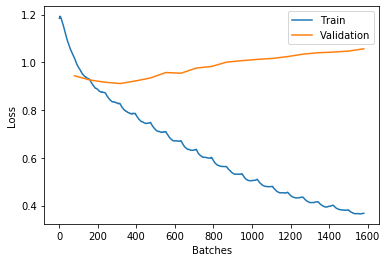

In [10]:
learn.recorder.plot(return_fig=True).savefig(path/'losses_1.png')

### 2.2 Static Learning Rate with Regularization

In [12]:
ratings_data = CollabData(ratings_latest, test_size=0.2, bs=256)

In [33]:
n_factors = 50
embedding_dropout = 0.02
hidden = [300, 200, 100]
dense_dropouts = [0.5, 0.4, 0.3]

learn = CollabLearner(ratings_data, EmbedNet, n_factors=n_factors, embedding_dropout=embedding_dropout, hidden=hidden, dense_dropouts=dense_dropouts, normalize_batches=False)
learn.model

EmbedNet(
  (u): Embedding(610, 50)
  (m): Embedding(9724, 50)
  (d): Dropout(p=0.02, inplace=False)
  (hidden_fc): Sequential(
    (0): Linear(in_features=100, out_features=300, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=300, out_features=200, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=200, out_features=100, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
  )
  (last_fc): Linear(in_features=100, out_features=1, bias=True)
)

In [34]:
learn.model.random_weights()

n_epochs = 5
lr = 3e-3
wd = 5e-1

learn.fit(n_epochs, lr, wd)

epoch: 0, train loss: 1.020640254020691, validation loss: 0.9475709199905396
epoch: 1, train loss: 0.9157619476318359, validation loss: 0.8986190557479858
epoch: 2, train loss: 0.8678551912307739, validation loss: 0.87647545337677
epoch: 3, train loss: 0.8448324203491211, validation loss: 0.8750568628311157
epoch: 4, train loss: 0.8329213857650757, validation loss: 0.8723862767219543


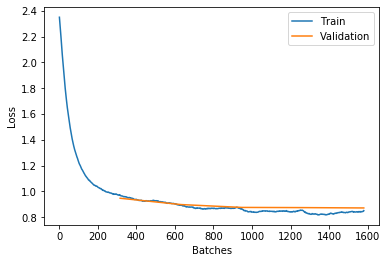

In [35]:
learn.recorder.plot(return_fig=True).savefig(path/'losses_2.png')

### 2.3 Dynamic Learning Rate with Regularization

In [28]:
ratings_data = CollabData(ratings_latest, test_size=0.2, bs=256)

In [29]:
n_factors = 50
embedding_dropout = 0.02
hidden = [300, 200, 100]
dense_dropouts = [0.6, 0.4, 0.3]

learn = CollabLearner(ratings_data, EmbedNet, n_factors=n_factors, embedding_dropout=embedding_dropout, hidden=hidden, dense_dropouts=dense_dropouts, normalize_batches=False)
learn.model

EmbedNet(
  (u): Embedding(610, 50)
  (m): Embedding(9724, 50)
  (d): Dropout(p=0.02, inplace=False)
  (hidden_fc): Sequential(
    (0): Linear(in_features=100, out_features=300, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.6, inplace=False)
    (3): Linear(in_features=300, out_features=200, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=200, out_features=100, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
  )
  (last_fc): Linear(in_features=100, out_features=1, bias=True)
)

In [31]:
learn.model.random_weights()

n_epochs = 5
lrs = [5e-3, 5e-3, 3e-3, 3e-3, 4e-3, 5e-3]
wd = 5e-1

learn.fit_one_cycle(cycle_len=n_epochs, lr_max=lrs, wd=wd, div_factor=5, final_div=7, pct_start=0.2, moms=(0.92, 0.88))

epoch: 0, train loss: 1.0508028268814087, validation loss: 0.9626069068908691
epoch: 1, train loss: 0.9266564846038818, validation loss: 0.8990121483802795
epoch: 2, train loss: 0.8661162257194519, validation loss: 0.8722942471504211
epoch: 3, train loss: 0.829511821269989, validation loss: 0.8660961985588074
epoch: 4, train loss: 0.7963228821754456, validation loss: 0.8650093674659729


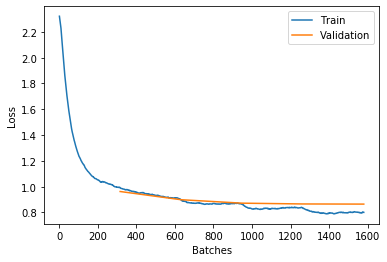

In [32]:
learn.recorder.plot(return_fig=True).savefig(path/'losses_3.png')

## 3. Predict

In [134]:
learn.get_preds('val')

array([[3.85365057, 5.        ],
       [3.82093   , 4.5       ],
       [3.35521889, 4.        ],
       ...,
       [3.80756617, 4.5       ],
       [3.6175766 , 3.        ],
       [3.52774763, 3.        ]])